# Домашнее задание 2 (30 + 20 + 25 + 30 = 105 pts )

## Задача 1 (30 pts)

- (5 pts) Докажите, что $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$, если $\mathrm{vec}(X)$ векторизация матрицы по столбцам. Что и почему изменится, если использовать векторизацию по строкам? 

- (2 pts) Какова сложность наивного вычисления $(A \otimes B) x$ и почему она такова? Покажите, как она может быть снижена.

- (3 pts) Пусть матрицы $A$ и $B$ имеют спектральные разложения $A = S_A\Lambda_A S_A^{-1}$ и $B = S_B\Lambda_B S^{-1}_B$. Найдите собственные векторы и собственные значения у матрицы $A\otimes I + I \otimes B$.

- (10 pts) Пусть $A = \mathrm{diag}\left(\frac{2}{1000},\frac{3}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Оцените аналитически число итераций необходимых для решения линейной системы с матрицей $A$ с относительной точностью $10^{-5}$ используя
    - метод Ричардсона с оптимальным параметром (используйте евклидову норму)
    - метод Чебышёва (используйте евклидову норму)
    - метод сопряжённых градиентов (используйте $A$-норму).
    
и сравните вашу оценку с экспериментальными результатами.

- (5 pts) Рассмотрим систему линейных уравнений вида $(I + uu^{\top})x = b$, $u \neq 0$. За сколько итераций сойдётся метод сопряжённых градиентов для этой системы? Получите ответ аналитически, псле чего приведите экспериментальное подтверждение его правильности.

- (5 pts) Покажите, как связан детерминант матрицы
$$
\begin{bmatrix}
x & 1 & 0 & \ldots & 0\\
1 & 2x & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 2x & 1 \\
0 & 0 & \ldots & 1 & 2x
\end{bmatrix}
$$

с полиномом Чебышёва степени $n$

# Решение:

- (5 pts) Докажите, что $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$, если $\mathrm{vec}(X)$ векторизация матрицы по столбцам. Что и почему изменится, если использовать векторизацию по строкам? 

$\mathrm{vec}(X)$ - оператор векторизации матрицы по столбцам. Так как он линеен, а $(B^\top \otimes A)$ - Кронекерово произведение матриц $B^\top$ и $A$, то есть матрица 
$\begin{bmatrix}b_{11}A & \dots & b_{m1}A \\ \vdots & \ddots & \vdots \\ b_{1n}A & \dots & b_{mn}A\end{bmatrix}\in\mathbb{R}^{nl\times mk}$ для $B\in\mathbb{R}^{m\times n}$ и $A\in\mathbb{R}^{l\times k}$,
то линейны и операторы $\mathrm{vec}(AXB)$ и $(B^\top \otimes A)\, \mathrm{vec}(X)$ ,
поэтому достаточно доказать исходное равенство для базисного элемента в пространстве $\mathbb{R}^{k\times m}$, то есть для матрицы $E_{ij}$, у которой в $i$-ой строчке и $j$-ом столбце стоит $1$, а остальные $0$.

По определению Кронекеровое произведение векторов $x\in \mathbb{R}^k, y\in \mathbb{R}^m$ есть вектор $x\otimes y \in \mathbb{R}^{km}$, состовленный из последовательных попарных произведений элементов вектора $x$ на элементы вектора $y$. Что есть то же самое, что $\mathrm{vec}\Big(\begin{bmatrix}x_{1}y_1 & \dots & x_{k}y_1 \\ \vdots & \ddots & \vdots \\ x_1y_m & \dots & x_{k}y_m\end{bmatrix}\Big) = \mathrm{vec}(yx^\top)$

Тогда ещё в силу того факта, что $E_{ij}$ можно представить в виде $e_ie_j^\top$ получим:

$$ \mathrm{vec}(E_{ij}) = \mathrm{vec}(e_ie_j^\top) = e_j \otimes e_i$$

В силу такого свойства Кронекерово произведения, что $(A\otimes B) (C\otimes D) = AC \otimes BD$ получим:

$$\mathrm{vec}(AE_{ij}B) = \mathrm{vec}(Ae_ie_j^\top B)=\mathrm{vec}(Ae_i(B^\top e_j)^\top ) = B^\top e_j \otimes Ae_i=(B^\top \otimes A)  (e_j \otimes e_i)=(B^\top \otimes A) \mathrm{vec}(E_{ij})$$

Для получения формулы для векторизации по строчкам заметим, что $\mathrm{vec}^*(xy^\top) = \mathrm{vec(yx^\top)}=x\otimes y$. Отсюда

$$\mathrm{vec}^*(AE_{ij}B)=\mathrm{vec}^*(Ae_i(B^\top e_j)^\top )= Ae_i \otimes B^\top e_j = (A \otimes B^\top)(e_i \otimes e_j)=(A \otimes B^\top)\mathrm{vec}^*(e_ie_j^\top)=(A \otimes B^\top)\mathrm{vec}^*(E_{ij})$$

Следовательно, $$\mathrm{vec}^*(AXB)=(A \otimes B^\top)\mathrm{vec}^*(X)$$

- (2 pts) Какова сложность наивного вычисления $(A \otimes B) x$ и почему она такова? Покажите, как она может быть снижена.

Для матриц $A\in\mathbb{R}^{n\times m}$ и $B\in\mathbb{R}^{l\times k}$ Кронекерово произведение определяется как блочная матрица следующего вида

$$
   A\otimes B = \begin{bmatrix}a_{11}B & \dots & a_{1m}B \\ \vdots & \ddots & \vdots \\ a_{n1}B & \dots & a_{nm}B\end{bmatrix}\in\mathbb{R}^{nl\times mk}.
$$

То есть для вычисления $A\otimes B$ потребуется $nm$ раз умножить матрицу $B$ на число, каждое умножение потребует $lk$ операций, поэтому сложность вычисления $A\otimes B$ будет $O(nmlk)$. Затем нужно будет каждую строчку матрицы $A\otimes B$ умножить на вектор $x\in \mathbb{R}^{mk}$, то есть потребуется ещё $O(nmlk)$ операций. Тогда общая сложность будет $O(nmlk)$.

Для снижения сложности воспользуемся доказанным в предыдущем пункте утверждением. Вектор $x$ можно считать векторизацией по столбцам матрицы $X\in \mathbb{R}^{k\times m}$, тогда

$(A \otimes B) x = (A \otimes B)\mathrm{vec}(X)=\mathrm{vec}(BXA^\top)$. Для вычисления $BXA^\top$ потребуется $lkm +lmn=lm(k+n)$ умножений и $l(k-1)m+l(m-1)n$ сложений.Таким образом, сложность вычисления $\mathrm{vec}(BXA^\top)$ будет $O(lm(k+n)),$ так как векторизация даже с учётом заполнения нового вектора потребует меньше операций.

- (3 pts) Пусть матрицы $A$ и $B$ имеют спектральные разложения $A = S_A\Lambda_A S_A^{-1}$ и $B = S_B\Lambda_B S^{-1}_B$. Найдите собственные векторы и собственные значения у матрицы $A\otimes I + I \otimes B$.

Воспользуемся предоставленными спектральными разложениями,свойствами Кронекерового произведения, ассоциативностью и дистрибутивностью матричного умножения.

$$A\otimes I + I \otimes B = S_A\Lambda_A S_A^{-1}\otimes I + I \otimes S_B\Lambda_B S^{-1}_B = S_A\Lambda_A S_A^{-1}\otimes S_BS^{-1}_B + S_AS_A^{-1}\otimes S_B\Lambda_B S^{-1}_B = (S_A \otimes S_B)(\Lambda_A S_A^{-1}\otimes S^{-1}_B) +  (S_A \otimes S_B)(S_A^{-1}\otimes \Lambda_B S^{-1}_B) = (S_A \otimes S_B)(\Lambda_A S_A^{-1}\otimes I S^{-1}_B) +  (S_A \otimes S_B)(IS_A^{-1}\otimes \Lambda_B S^{-1}_B) = (S_A \otimes S_B)(\Lambda_A \otimes I)(S_A^{-1}\otimes S^{-1}_B)  +  (S_A \otimes S_B)(I \otimes \Lambda_B)(S_A^{-1} \otimes S^{-1}_B)=(S_A \otimes S_B)(\Lambda_A \otimes I+I \otimes \Lambda_B)(S_A^{-1} \otimes S^{-1}_B) = (S_A \otimes S_B)(\Lambda_A \otimes I+I \otimes \Lambda_B)(S_A \otimes S_B)^{-1} $$

$\Lambda_A \otimes I = \begin{bmatrix}\lambda_{1}(A) I & \dots & 0I \\ \vdots & \ddots & \vdots \\ 0I & \dots & \lambda_{n}(A)I\end{bmatrix} =  
\begin{bmatrix}\lambda_{1}(A) & \dots & 0 &\dots & 0 &\dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & \lambda_{1}(A) &\dots & 0 &\dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & 0 & \dots & \lambda_{n}(A) &\dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & 0 & \dots & 0 &\dots &\lambda_{n}(A)\\
\end{bmatrix}$

$I\otimes \Lambda_B = \begin{bmatrix}
1\Lambda_B & \dots & 0\Lambda_B \\
\vdots & \ddots & \vdots \\
0\Lambda_B & \dots & 1\Lambda_B\end{bmatrix}=
\begin{bmatrix}\lambda_{1}(B) & \dots & 0 &\dots & 0 &\dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & \lambda_{n}(B) &\dots & 0 &\dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & 0 & \dots & \lambda_{1}(B) &\dots & 0\\
\vdots & \ddots & \vdots & \ddots & \vdots & \ddots & \vdots\\
0 & \dots & 0 & \dots & 0 &\dots &\lambda_{n}(B)\\
\end{bmatrix}$

Получили спектральное разложение матрицы $A\otimes I + I \otimes B$. Таким образом, собственные значения матрицы $A\otimes I + I \otimes B$ есть все возможные попарные суммы собственных значений матриц $A$ и $B$. То есть всего $n^2$ собственных значений. Собственные векторы - столбцы матрицы $S_A \otimes S_B.$

- (10 pts) Пусть $A = \mathrm{diag}\left(\frac{2}{1000},\frac{3}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Оцените аналитически число итераций необходимых для решения линейной системы с матрицей $A$ с относительной точностью $10^{-5}$ используя
    - метод Ричардсона с оптимальным параметром (используйте евклидову норму)
    - метод Чебышёва (используйте евклидову норму)
    - метод сопряжённых градиентов (используйте $A$-норму).
    
и сравните вашу оценку с экспериментальными результатами.

Заметим, что $A = A^* > 0$

Тогда для одношагового метода Ричардсона с учётом выбора оптимального параметра $\tau$ $$x_{k+1} = x_k - \tau (Ax_k - f)$$ 
$$\tau_\mathrm{opt} = \frac{2}{\lambda_{\min} + \lambda_{\max}}$$

$$ \|e_k\|_2 \leq q^{k} \|e_0\|_2$$

$$ q = \frac{\lambda_{\max} - \lambda_{\min}}{\lambda_{\max} + \lambda_{\min}}= \frac{\mathrm{cond}(A) - 1}{\mathrm{cond}(A)+1}$$

Для данной матрицы $A\quad$ $\lambda_{\max} = 1000,\quad \lambda_{\min} = 0.002$. Следовательно, $q=\frac{1000-0.002}{1000+0.002}$

Относительная точность по условию $ \frac{\|e_k\|_2 }{\|e_0\|_2} \leq q^{k}\le 10^{-5} $

Отсюда $k \ge \frac{-5}{\log q}\approx 2.9 * 10^{6}$

In [7]:
import numpy as np
import scipy as sp
import scipy.sparse as spsp
import matplotlib.pyplot as plt

In [10]:
A = np.arange(2, 1002) / 1000
A[-1] = 1000
A = spsp.diags(A)
lambda_max = 1000
lambda_min = 0.002

In [11]:
%%time

tau = 2 / (lambda_max + lambda_min)
q = (lambda_max - lambda_min) / (lambda_max + lambda_min)
x_true = np.random.random(1000)
b = A.dot(x_true)
x = np.zeros(1000)
mistake_0 = np.linalg.norm(x - x_true)
relative_mistake = 1
norm_nevyazka_richardson = []
while (relative_mistake > 1e-05):
    nevyazka = A.dot(x) - b
    norm_nevyazka_richardson.append(np.linalg.norm(nevyazka))
    x -= tau * nevyazka
    relative_mistake = np.linalg.norm(x - x_true) / mistake_0

Wall time: 1min 29s


In [12]:
len(norm_nevyazka_richardson)

2169621

Сошёлся быстрее, но оценка на точность была сверху, так что всё в порядке

Применим метод Чебышёва, то есть оптимальный циклический итерационный метод, так как $A = A^* > 0$. То есть в формуле простой итерации $\tau = \tau_{k+1},\ \tau_k=\tau_{k+N}$. Оптимальные значения для $\tau_1,...,\tau_N$ - обратные величины к корням многочлена Чебышёва степени $N$, масштабированным из $[-1,1]$ в $[\lambda_\min, \lambda_\max]$, то есть
$$\tau_k = \frac{2}{\lambda_\max + \lambda_\min + (\lambda_\max - \lambda_\min)x_k}, \quad x_k = \cos \frac{\pi(2k - 1)}{2N}\quad k=1,\dots,N$$

Для этого метода в силу свойств многочленов Чебышёва верна оценка
$$ \|e_N\|_2 \leq \frac{2 q_1^N}{1+q_1^{2N}} \|e_0\|_2, \quad q_1 = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}, $$

Что лучше, чем у метода Ричардсона с оптимальным $\tau$

Таким образом, считая для простоты, что $k=pN$.Это сильно не повлияет на оценку числа итераций для небольшого $N$.
$$ \|e_k\|_2 = \|e_{pN}\|_2 \leq \Big(\frac{2 q_1^N}{1+q_1^{2N}}\Big)^p \|e_0\|_2 = \Big(\frac{2 q_1^N}{1+q_1^{2N}}\Big)^p \|e_0\|_2$$

$$ \frac{\|e_k\|_2}  {\|e_0\|_2} \le C q_1^k \le 10^{-5},\ \textit{где}\ C=\Big(\frac{2}{1+q_1^{2N}}\Big)^p$$

Отсюда $$k\log q_1 + \frac{K}{N}\log \frac{2}{1+q_1^{2N}} \ge -5$$
$$k\ge \frac{-5}{\log q_1 + \frac{1}{N}\log \frac{2}{1+q_1^{2N}}}\approx 4.5 * 10^4\textit{ для}\ N = 64$$

In [20]:
# Корни ещё нужно расставить в правильном порядке
# Также чтобы не пропала оптимальность, N должно быть стопенью 2
N = 64
def leb_shuffle_2n(n):
    if n == 1:
        return np.array([0,], dtype=int)
    else:
        prev = leb_shuffle_2n(n // 2)
        ans = np.zeros(n, dtype=int)
        ans[::2] = prev
        ans[1::2] = n - 1 - prev
        return ans

good_perm_even = leb_shuffle_2n(N)

roots = [np.cos((np.pi * (2 * i + 1)) / (2 * N)) for i in range(N)]
taus = [2 / (lambda_max + lambda_min + (lambda_max - lambda_min) * r)  for r in roots]

In [21]:
%%time

x = np.zeros(1000)
relative_mistake = 1
norm_nevyazka_chebushev = []
while (relative_mistake > 1e-05):
    for i in range(N):
        nevyazka = A.dot(x) - b
        norm_nevyazka_chebushev.append(np.linalg.norm(nevyazka))
        x -=  taus[good_perm_even[i]] * nevyazka
        relative_mistake = np.linalg.norm(x - x_true) / mistake_0

Wall time: 1.56 s


In [22]:
len(norm_nevyazka_chebushev)

38464

Снова получили число итераций, немного меньшее заказанного, но оценка на тончость была сверху, поэтому всё в порядке

Для метода сопряжённых градиентов совершенно аналогично методу Чебышёва, но уже для A-нормы можно получить оценку

$$\frac{\Vert e_k \Vert_A }{\Vert e_0 \Vert_A} \leq \frac{2 q_1^k}{1+q_1^{2k}}\le 2 q_1^k, \quad q_1 = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}$$

Однако известно, что если собственные значения кластеризованы и имеется $l$ выбросов, тогда после первых $\mathcal{O}(l)$ итераций CG сойдётся как будто этих выбросов не было (следовательно, эффективное число обусловленности меньше). А у нас как раз имеет выбром lambda_max = 1000, так что можем считать, что lambda_max = 1.

Отсюда получаем, что $$\frac{\Vert e_k \Vert_A }{\Vert e_0 \Vert_A} \leq 2 q_1^k\le 10^{-5},\  q_1=\frac{\sqrt{\mathrm{cond}(\tilde A)}-1}{\sqrt{\mathrm{cond}(\tilde A)}+1}=\frac{\sqrt{500}-1}{\sqrt{500}+1}$$
$$k\ge \frac{-5-\log 2}{\log q_1}\approx 1.36 * 10^2$$

In [73]:
%%time

x = np.zeros(1000)
relative_mistake = 1
r_i = b - A.dot(x)
p_i = b - A.dot(x)
norm_nevyazka_sopr_grad = [np.linalg.norm(r_i)]
while (relative_mistake > 1e-05):   
    alpha = (r_i @ p_i) / (A.dot(p_i) @ p_i)
    x += alpha * p_i
    r_i1 = b - A.dot(x)
    beta = -(r_i1 @ A.dot(p_i)) / (A.dot(p_i) @ r_i)
    p_i1 = r_i1 + beta * p_i
    r_i = r_i1
    p_i = p_i1
    norm_nevyazka_sopr_grad.append(np.linalg.norm(r_i))
    relative_mistake = np.linalg.norm(x - x_true) / mistake_0

Wall time: 19.9 ms


In [74]:
len(norm_nevyazka_sopr_grad)

140

Так как сначала алгоритм должен был избавиться от выбросов, то считаем, что количество итераций именно такое, как и предполагалось

- (5 pts) Рассмотрим систему линейных уравнений вида $(I + uu^{\top})x = b$, $u \neq 0$. За сколько итераций сойдётся метод сопряжённых градиентов для этой системы? Получите ответ аналитически, псле чего приведите экспериментальное подтверждение его правильности.

Матрица $A:=(I + uu^{\top})$ имеет в качетсве собственных значений $n-1$ единицу и $1+(u,u)$. Это следует из явного вида характеристического многочлена. Доказывается просто по индукции. База для $n=2$ очевидна. А при доказательстве шага раскрываем определитель по первой строчке и пользуемся предположением индукции.

Таким образом, матрица $A$ имеет только два различных собственных значения. А в этом случае, как было рассмотрено на лекции, метод сопряжённых градиентов должен сходиться за $2$ итерации.

In [125]:
n = 1000
u = np.random.random(n).reshape(-1,1)
I = np.eye(n)
A = I + u @ u.T

In [126]:
%%time

b = A.dot(x_true)
x = np.zeros(n)
relative_mistake = 1
r_i = b - A.dot(x)
p_i = b - A.dot(x)
norm_nevyazka_sopr_grad = [np.linalg.norm(r_i)]
while (relative_mistake > 1e-05):   
    alpha = (r_i @ p_i) / (A.dot(p_i) @ p_i)
    x += alpha * p_i
    r_i1 = b - A.dot(x)
    beta = -(r_i1 @ A.dot(p_i)) / (A.dot(p_i) @ r_i)
    p_i1 = r_i1 + beta * p_i
    r_i = r_i1
    p_i = p_i1
    norm_nevyazka_sopr_grad.append(np.linalg.norm(r_i))
    relative_mistake = np.linalg.norm(x - x_true) / mistake_0

Wall time: 8 ms


In [128]:
len(norm_nevyazka_sopr_grad)

3

Если не считать за итерацию объявление начального приближения, то получаем, что алгоритм как раз за $2$ итерации и сходится

- (5 pts) Покажите, как связан детерминант матрицы
$$
\begin{bmatrix}
x & 1 & 0 & \ldots & 0\\
1 & 2x & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 2x & 1 \\
0 & 0 & \ldots & 1 & 2x
\end{bmatrix}
$$

с полиномом Чебышёва степени $n$

Разложим определитель матрицы по последней строчке, тогда получим
$$ I_n(x) =  2xI_{n-1}(x) - \det
\begin{bmatrix}
x & 1 & 0 & \ldots & 0\\
1 & 2x & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \ldots & 2x & 0 \\
0 & 0 & \ldots & 0 & 1
\end{bmatrix}$$
Для подсчёта полученного определителя матрицы $(n-1)\times(n-1)$ разложим его по последнему столбцу, тогда получим
$$ I_n(x) =  2xI_{n-1}(x) - I_{n-2}(x)$$
Подсчитаем $I_1(x)$ и $I_2(x)$. $I_1(x) = x$, $I_2(x) = 2x^2-1$

А для многочлена Чебышева верна такая же рукуррентная формула 
$$T_n(x) = 2x T_{n-1}(x) - T_{n-2}(x)$$ с такими же начальными значениями $$\quad T_1(x)=x, \quad T_2(x)=2x^2-1$$

Отсюда в силу единственности решения рекуррентных формул при наличии начальных условий получаем, что $I_n(x) = T_n(x)$

## Задача 2 (20 pts)

### Спектральное разбиение графа и обратная итерация


Дан связный граф $G$ и соответствующий ему лапласиан $L = D - A$ с собственными значениями  $0=\lambda_1, \lambda_2, ..., \lambda_n$, где $D$ диагональная матрица со степенями вершин на диагонали, а $A$ – матрица смежности.
Вектор Фидлера – это собственный вектор, соответствующий собственному значению $\lambda_2$ матрицы $L$. Этот вектор может быть использован для разбиения графа: положительные значения соответствуют одной части графа, отрицательные – другой.

### Метод обратной итерации

Для поиска вектора Фидлера мы будем использовать метод Релея.

* (10 pts) Выпишите матрицу ортопроектора на подпространство ортогональное собственному вектору матрице $L$, соответствующему собственному значению $0$ и докажите (аналитически), что это действительно ортопроектор.

Для определённости того, степени исходящих или входящих вершин находятся в матрице $D$, считаем, что граф $G$ неориентированный. Это не повлияет на решение. 

В $i$-ой строчке матрицы $A$ находятся $1$ на местах вершин, которые связаны ребром с вершиной $i$. Суммы по строчкам в матрице $A$ - степени вершин графа $G$ (как и по столбцам), так как $A$ симметричная.

Таким образом, у $L$ сумма по строчкам равна $0$, как и по столбцам. Отсюда собсвтенный вектор, удовлетворяющий собственному значению, равному $0$, - вектор из единиц $e$:

$$Lx=0$$ 
$$L\begin{pmatrix}1 \\  \vdots \\ 1\end{pmatrix}=\begin{pmatrix}l_{11}+...+l_{1n} \\  \vdots \\ l_{n1}+...+l_{nn}\end{pmatrix}=\begin{pmatrix}0 \\  \vdots \\ 0\end{pmatrix}$$

Пространство $U$, ортогональное вектору $e$, - множество векторов, скалярное произведение которых с $e$ даёт $0$.

То есть множество $\{u=(u_1,u_2,...,u_n)\in R^n: \sum_{i=1}^{n}u_i=0\}$

По определению ортопроектор $P$ разбивает пространство $R^n$ в прямую сумму ортогональных подпространств $U$ и $V$. При этом $\forall u\in U,\ v\in V\ P(u+v)=u$. $V$ - пространство, натянутое на вектор $e$.

Отсюда $$\forall i\ \sum_{j=1}^{n}p_{ij}(u_j+v_j)=\{v=ce\}=c\sum_{j=1}^{n}p_{ij}+\sum_{j=1}^{n}p_{ij}u_j=u_i$$

Надо занулить первую сумму, а из второй сделать $u_i$

По аналогии с построением матрицы $L$ на роль ортопроектора $P$ подходит разность единичной матрицы и матрицы из $\frac{1}{n}$

То ессть $$P=
\begin{pmatrix}
1 & 0  & \ldots & 0\\
0 & 1  & \ldots & 0\\
\vdots & \vdots & \vdots & \vdots &  \\
0 & 0 & \ldots & 1 \\
\end{pmatrix} - \frac{1}{n} 
\begin{pmatrix}
1 & 1  & \ldots & 1\\
1 & 1  & \ldots & 1\\
\vdots & \vdots & \vdots & \vdots &  \\
1 & 1 & \ldots & 1 \\
\end{pmatrix} = \begin{pmatrix}
1-\frac{1}{n} & -\frac{1}{n}  & \ldots & -\frac{1}{n}\\
-\frac{1}{n} & 1-\frac{1}{n}  & \ldots & -\frac{1}{n}\\
\vdots & \vdots & \vdots & \vdots &  \\
-\frac{1}{n} & -\frac{1}{n} & \ldots & 1-\frac{1}{n} \\
\end{pmatrix}$$

Для неё как раз $$c\sum_{j=1}^{n}p_{ij}+\sum_{j=1}^{n}p_{ij}u_j=0- \frac{1}{n}\sum_{j=1}^{n}u_j+u_i=u_i$$

* (5 pts) Реализуйте функцию спектрального разделения графа ```partition```:

Алгоритм должен останавливаться спустя `num_iter_fix + num_iter_adapt` итераций или если выполнено следующее соотношение

$$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ на некотором шаге } k.$$

Не забудьте использовать ортогональную проекцию из задачи выше в итерационном процессе, чтобы получить верный собственный вектор.
Также хорошей идеей могло быть использование ```shift=0``` до запуска адаптивного режима. Однако это невозможно в силу вырождннности матрицы $L$, а разреженное разложенное в ```scipy``` не работет в этом случае. Поэтому вместо нулевого сдвига предлагается использовать некоторое малое значение.

Реализуем метод обратной итерации для поиска вектора Фидлера (то есть с.в. соответствующий нулевому с.з., так как хотим таким образом разделить граф по разные стороны от нуля), при этом ускорив сходимость с помощью итераций Релея. Сначала сделаем некоторое число итераций простого метода обратной итерации, чтобы приблизить x_k к нужному собственному вектору

$$x_{k+1} = (A - \lambda_k I)^{-1} x_k,\ x_{k+1} = \frac{x_{k+1}}{||x_{k+1}||_2},$$

а затем будем использовать итерацию Релея, суть которой заключается в выборе конкретного параметра сдвига на каждом шаге метода обратной итерации


$$\lambda_k = \frac{(Ax_k, x_k)}{(x_k, x_k)}$$

Чтобы получить именно нужный собственный вектор, не тот, который соответствует с.з. $0$, нужно воспользоваться ортопроектором $P$, найденным в предыдущем пункте. То есть проецировать получающийся с.в. вектор на подпространство, ортогональное подпространству, натянутому на с.в., соответствующий с. з. $0$. То есть будем искать с.в. , соответствующий минимальному по модулю с.з. там, где нет собственных векторов, соответствующих нулевому с.з. Таким образом, найдём именно с.в., соответствующий $\lambda_2$.

In [59]:
import scipy.sparse.linalg as spsplin
from scipy.sparse import csr_matrix

In [202]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (float)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)

def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    D = spsp.diags(np.asarray(np.sum(A, axis=0))[0])
    L = D - A
    x = x0.copy()
    x = x / np.linalg.norm(x)
    eigenval_k = np.random.random(1)[0] # зададим случайное начальное приближение для собственного значения
    eigs = [eigenval_k]
    relative_tolerance = []
    for i in range(num_iter_fix):
        x = spsplin.spsolve(L - shift * spsp.eye(A.shape[0]), x) # решаем систему уравнений на x_k+1 с правой частью x_k
        x = x - np.ones(A.shape[0])*np.sum(x) / A.shape[0]       # проецируем
        x = x / np.linalg.norm(x)
        eigenval_k1 = x.dot(L.dot(x))
        eigs.append(eigenval_k1)
        relative_tolerance.append(np.linalg.norm(eigenval_k1 - eigenval_k)/np.linalg.norm(eigenval_k))
        eigenval_k = eigenval_k1
        if relative_tolerance[-1] <= eps:
            return x, eigs, relative_tolerance
    for i in range(num_iter_adapt):
        shift = x.dot((L.dot(x))) 
        x = spsplin.spsolve(L - shift * spsp.eye(A.shape[0]), x) 
        x = x - np.ones(A.shape[0])*np.sum(x) / A.shape[0]
        x = x / np.linalg.norm(x)
        eigenval_k1 = x.dot(L.dot(x))
        eigs.append(eigenval_k1)
        relative_tolerance.append(np.linalg.norm(eigenval_k1 - eigenval_k)/np.linalg.norm(eigenval_k))
        eigenval_k = eigenval_k1
        if relative_tolerance[-1] <= eps:
            return x, eigs, relative_tolerance
    return x, eigs, relative_tolerance       

* (3 pts) Сгенерируйте случайный `lollipop_graph`, используя библиотеку `networkx`, и найдите его разбиение. [Нарисуйте](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) этот граф с вершинами, окрашенными в соответствии с разбиением.

* (2 pts) Запустите метод со случайного начального приближение ```x0```, установите ```num_iter_fix=0``` и объясните, почему метод может сойтись к неверному собственному значению?

In [1]:
import networkx as nx

In [51]:
G = nx.lollipop_graph(10, 20)
pos=nx.spring_layout(G)  # positions for all nodes

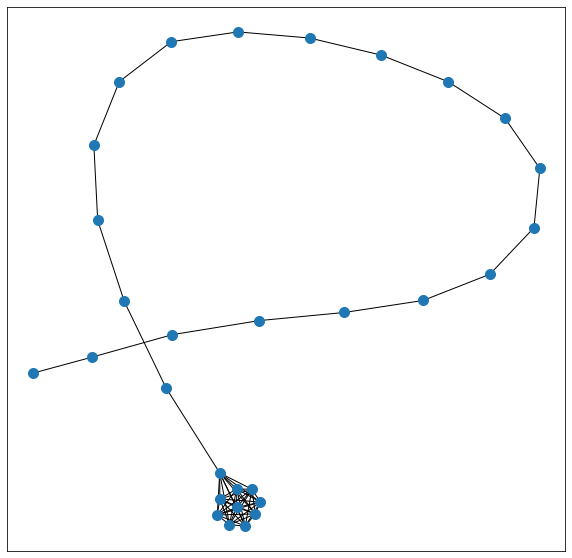

In [53]:
fig = plt.figure(figsize=(10, 10))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos,node_size=100)
plt.show()

In [129]:
A = nx.adjacency_matrix(G)

Запустим алгоритм поиска вектора Фидлера

In [203]:
x, eigs, eps = partition(A=A, shift = 1e-4, num_iter_fix = 5, num_iter_adapt=10, x0=np.ones(A.shape[0]), eps = 1e-12)

Получим следующие результаты

In [204]:
x

array([ 0.19386087,  0.19386087,  0.19386087,  0.19386087,  0.19386087,
        0.19386087,  0.19386087,  0.19386087,  0.19386087,  0.19139217,
        0.16673659,  0.13995771,  0.11139656,  0.08141684,  0.05040032,
        0.01874199, -0.01315501, -0.04488449, -0.07604239, -0.10623194,
       -0.13506869, -0.16218542, -0.18723681, -0.20990386, -0.22989791,
       -0.24696434, -0.26088583, -0.2714851 , -0.27862716, -0.28222108])

In [205]:
eigs

[0.08400900975272307,
 0.013582571643055276,
 0.012763568969166406,
 0.01273561505922678,
 0.012734452604105764,
 0.0127344033047651,
 0.012734401114602913,
 0.01273440111460263]

In [206]:
eps

[0.8383200601574164,
 0.06029805661342656,
 0.0021901327134405545,
 9.127593097076818e-05,
 3.871335674664368e-06,
 1.7198781400360508e-07,
 2.2204414957525596e-14]

Убедимся в том, что нашли то, что нужно

In [211]:
D = spsp.diags(np.asarray(np.sum(A, axis=0))[0])
L = D - A

In [214]:
eigs_, _ = np.linalg.eig(L.toarray())

In [215]:
eigs_

array([1.10113519e+01, 2.65412692e-16, 1.27344011e-02, 6.13435043e-02,
       1.53180277e-01, 2.87674166e-01, 4.62007750e-01, 6.72247482e-01,
       9.13584134e-01, 1.18046967e+00, 1.46674795e+00, 1.76579376e+00,
       2.07066111e+00, 2.37423934e+00, 2.66941423e+00, 2.94923170e+00,
       3.20706090e+00, 3.97633270e+00, 3.90591147e+00, 3.79046093e+00,
       3.63279867e+00, 3.43675394e+00, 1.00000000e+01, 1.00000000e+01,
       1.00000000e+01, 1.00000000e+01, 1.00000000e+01, 1.00000000e+01,
       1.00000000e+01, 1.00000000e+01])

Да, всё правильно, здесь $\lambda_2=1.2734e-02$ - именно то, которое нашёл алгоритм

Построим разбиение графа. Положительные значения вектора Фидлера соответствуют одной части графа, отрицательные – другой.

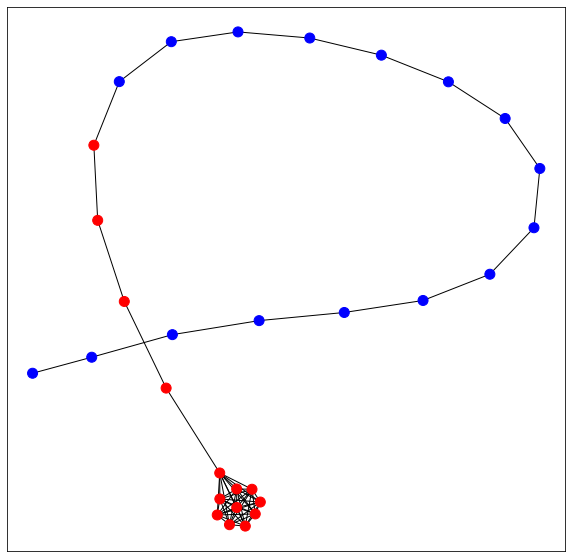

In [207]:
fig = plt.figure(figsize=(10, 10))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos,node_size=100, node_color=['r'] * len(x[x<0]) + ['b'] * len(x[x>0]))
plt.show()

Запустим метод со случайного начального приближения x0 и num_iter_fix=0

In [208]:
x, eigs, eps = partition(A=A, shift = 1e-4, num_iter_fix = 0, num_iter_adapt=10, x0=np.random.random(A.shape[0]), eps = 1e-12)

In [200]:
x

array([-0.03160243, -0.03160243, -0.03160243, -0.03160243, -0.03160243,
       -0.03160243, -0.03160243, -0.03160243, -0.03160243, -0.00273095,
        0.25960732,  0.28477246,  0.049774  , -0.2306972 , -0.3004071 ,
       -0.09566984,  0.19646986,  0.30911782,  0.13936064, -0.15771421,
       -0.31070386, -0.17983939,  0.11532349,  0.30512866,  0.21617313,
       -0.07027475, -0.29252072, -0.24752441,  0.02360628,  0.27317065])

In [209]:
eigs

[0.004018153329349405,
 0.9906822749460585,
 0.9215397375798664,
 0.9135924891532455,
 0.9135841339663437,
 0.9135841339663355]

In [210]:
eps

[245.5516354764052,
 0.06979284793397243,
 0.008623880341277318,
 9.14541986825132e-06,
 8.992768237510593e-15]

Видим, что метод сошёлся к неверному собственному значению, это связано с тем, что метод Релея зависит только от $x_0$, которое ему передаётся, в нём нельзя задать приближение к искомому собственному значению, кроме как с помощью начального приближения собственного вектора. Таким образом, вся сходимость определяется этим $x_0$, именно поэтому перед использованием метода Релея следует с помощью простого метода обратной итерации построить хоть какое-то приближение собственного вектора, соответствующее искомому  собственному значению.

## Задача 3 (25 pts)

## PageRank для DBLP


#### Введение дэмпфирующего фактора

* (5 pts) Напишите функцию ```pagerank_matrix(G)```, которая из поданной на вход матрицы смежности $G$ (в плотном или разреженном форматах) создаёт и возвращает матрицу PageRank'a $A$.

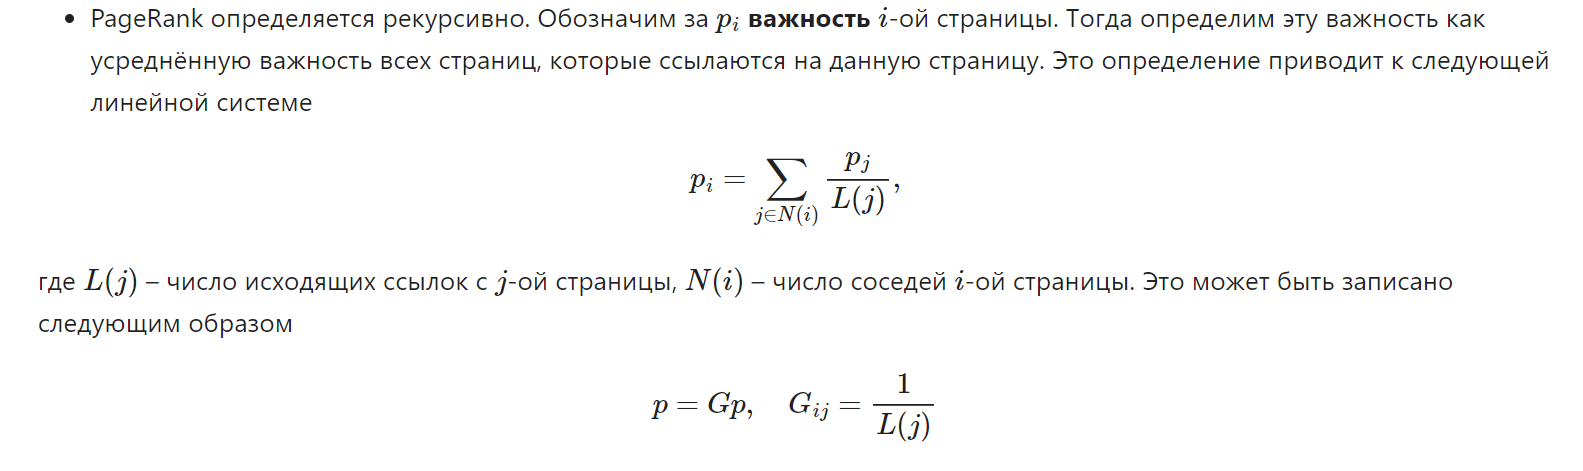

Напищем функцию для подсчёта матрицы $G$ на слайде, то есть матрицы $A$ в обозначениях задачи.

Считаем, что в $i$-ой строчке $j$-го столбца матрицы $G$ стоит $1$, если страница $i$ ссылается на страницу $j$, иначе $0$.

Таким образом, число ссылок, исходящих со страницы $j$ - сумма элементов в $j$-ой строчке маттрицы $G$.

На страницу $i$ ссылаются страницы, у которых в $i$-ом столбце стоит $1$.

Считаем, что на каждую страницу есть хотя бы $1$ ссылка, иначе ранк не определён. Также, хоть можно было обойтись и без этого, считаем, что из каждой страницы есть хотя бы одна ссылка, в противном случае не выполнялось бы условие, что у $G$ сумма элементов в каждом столбце равна $1$, были бы нулевые столбцы.

In [6]:
from scipy.sparse import diags
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix

In [3]:
# INPUT:  G - np.ndarray or sparse matrix
# OUTPUT: A - np.ndarray (of size G.shape) or sparse matrix
def pagerank_matrix(G):
    if type(G) == np.ndarray:
        return G.T / np.sum(G, axis = 1) 
    elif type(G) == csr_matrix:
        return G.multiply(csr_matrix(1 / np.sum(G, axis = 1))).T
    elif type(G) == csc_matrix:
        return G.multiply(csr_matrix(1 / np.sum(G, axis = 1))).T
    else: 
        print('incorrect matrix type')
        return G

На простом примере проверим, что реализация правильная. Пример взят по [ссылке](https://towardsdatascience.com/pagerank-algorithm-fully-explained-dc794184b4af)

In [38]:
G = np.array([[0,0,1,1,1],
              [0,0,0,0,1],
              [0,1,0,1,0],
              [0,1,0,0,0],
              [1,1,1,0,0]])

In [40]:
pagerank_matrix(G)

array([[0.        , 0.        , 0.        , 0.        , 0.33333333],
       [0.        , 0.        , 0.5       , 1.        , 0.33333333],
       [0.33333333, 0.        , 0.        , 0.        , 0.33333333],
       [0.33333333, 0.        , 0.5       , 0.        , 0.        ],
       [0.33333333, 1.        , 0.        , 0.        , 0.        ]])

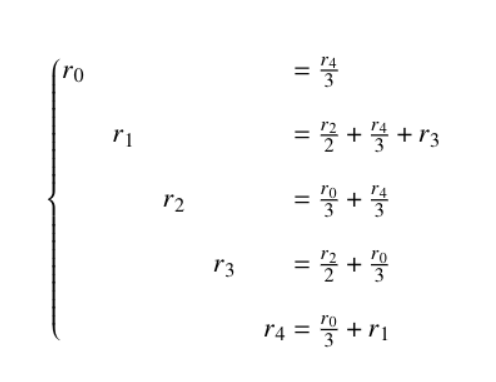

Видим, что алгоритм отработал правильно

* (5 pts) Реализуйте степенной метод для заданной матрицы $A$, начального вектора $x_0$ и числа итераций```num_iter``` в соответствии с прототипом ниже. Функция возвращает оценку собственного вектора, собственного значения и нормы невязки при сходимости. Проверьте, что ваша реализация сходится для матрицы $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$.

In [7]:
# INPUT:  A - np.ndarray (2D), x0 - np.ndarray (1D), num_iter - integer (positive)
# OUTPUT: x - np.ndarray (of size x0), l - float, res - np.ndarray (of size num_iter + 1 [include initial guess])
def power_method(A, x0, num_iter): # 5 pts
    x = x0.copy()
    x = x / np.linalg.norm(x)
    l = x @ (A @ x)
    res = [np.linalg.norm(A @ x - l * x)]
    for i in range(num_iter):
        x = A @ x
        x = x / np.linalg.norm(x)
        l = x @ (A @ x)
        nevyazka = np.linalg.norm(A @ x - l * x)
        res.append(nevyazka)
    return x, l, res

In [8]:
eigvec, eigval, nevyazka = power_method(A=np.array([[2, -1], [-1, 2]]), x0=np.random.random(2), num_iter=40)

In [9]:
eigval

3.0

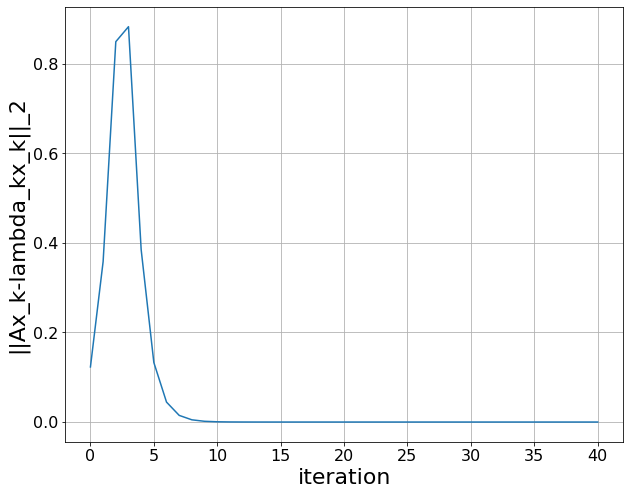

In [113]:
plt.figure(figsize=(10,8))
plt.plot(range(41), nevyazka, label = 'Residuals')
plt.xlabel("iteration", fontsize=22)
plt.ylabel("||Ax_k-lambda_kx_k||_2", fontsize=22)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Видим, что степенной метод достаточно быстро сошёлся к нужному собственному значению $3$.

Для избежания проблем со сходимостью степенного метода, обсуждённых на семинаре, можно ввести дэмпфирующий фактор и преобразовать матрицу PageRank'a следующим образом:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

где $d$ малый параметр из отрезка $[0,1]$ (обычно $d=0.85$), который называется **демпфирующим фактором**, $A$ размера $N\times N$. После такого преобразования максимальное собственное значение матрицы $A_d$ обладает кратностью равной 1. 

Именно это [предложили](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) сделать Ларри Пейдж и Сергей Брин для получения своего алгоритма ранжирвания веб-страниц.


* (4 pts) Реализуйте функцию быстрого умножения матрицы $A_d$ на вектор в соответствии с прототипом ниже ```pagerank_matvec(A, d, x)```. На вход функция принимает  матрицу PageRank'a $A$ (в разреженном формате, например ```csr_matrix```), демпфирующий фактор $d$ и начальный вектор $x$, а возвращает $A_dx$. 

In [49]:
# INPUT:  A - np.ndarray (2D), d - float (from 0.0 to 1.0), x - np.ndarray (1D, size of A.shape[0/1])
# OUTPUT: y - np.ndarray (1D, size of x)
def pagerank_matvec(A, d, x): # 2 pts
    y = d * A.dot(x) + (1 - d) * np.ones(A.shape[1]) * np.sum(x) / A.shape[1]
    return y

* (2 pts) Сгенерируйте случайную матрицу смежности $1000 \times 1000$ (если помещается в память, то увеличьте размер до $10000 \times 10000$) со 100 ненулевыми элементами и сравните время вычисления произведения матрицы и случайного вектора с помощью ```pagerank_matvec``` и явным вычислением $A_dx$.

In [19]:
d = 0.85
A = spsp.random(1000, 1000, 10**-4)
A = csr_matrix(A)
x = np.random.random(1000)

In [20]:
A_d = d * A + (1 - d) * csr_matrix(np.ones((A.shape[1], A.shape[1]))) / A.shape[1]

%timeit pagerank_matvec(A, d, x)
%timeit A_d.dot(x)

42.5 µs ± 3.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.86 ms ± 85 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Видим, насколько реализованное быстрое умножение матрицы $A_d$ на вектор лучше наивного

  Загрузите данные [отсюда](https://goo.gl/oZVxEa), разархивируйте и поместите файлы `dblp_authors.npz`  и `dblp_graph.npz` в папку рядом с этим ноутбуком. Каждое значение (имя автора) из `dblp_authors.npz` соответствует строке/столбцу в матрице из  `dblp_graph.npz`. Значения в строке `i` и столбце `j` матрицы `dblp_graph.npz` соответствуют числу раз, которое автор `i` цитировал статьи автора `j`. Давайте теперь найдём наиболее влиятельных авторов по величине Pagerank'a на основе данных DBLP.

* (5 pts) Загрузите взвешенную матрицу смежности и список авторов с помощью функции ```load_dblp(...)```. Выведите её плотность, то есть отношение числа ненулевых элементов к общему числу элементов. Найдите top-10 наиболее цитируемых авторов по значениям элементов этой матрицы. Далее сделайте все элементы равными 1 для простоты. Получите матрицу Pagerank'a из матрицы смежности и проверьте её стохастичность (сумма элементов по строкам/столбцам равна 1).
 
* (1 pts) Для того чтобы передать функцию ```pagerank_matvec``` в функцию ```power_method``` для быстрого вычисления матрично-векторного произведения $A_dx$, вы можете сделать ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Вызов ```L@x``` или ```L.dot(x)``` будет реализован путём вызова функции ```pagerank_matvec(A, d, x)```, таким образом, вы можете передать $L$ вместо матрицы $A$ в функцию ```power_method``` напрямую.


* (2 pts) Запустите степенной метод начиная с вектора из всех 1 и нарисуйте норму невязок $\|A_dx_k - \lambda_k x_k\|_2$  как функцию от $k$ для $d=0.85$.


* (1 pts) Выведите имена top-10 авторов по величине PageRank'a на основании графа DBLP с $d=0.85$. Прокомментируйте результат и сарвните его со списком наиболее цитируемых авторов.

In [4]:
from scipy.sparse import load_npz
import numpy as np
def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors
G, authors = load_dblp('dblp_authors.npz', 'dblp_graph.npz')

Подсчитаем плотность матрицы смежности $G$

In [5]:
G.nnz / (G.shape[0] * G.shape[1])

4.4986518152305776e-05

Найдём top-10 наиболее цитируемых авторов

In [6]:
in_degrees = np.asarray(np.sum(G, axis=0))[0]
sorted_indexes = np.argsort(in_degrees)
best_authors = authors[sorted_indexes[-10:]]
best_scores = in_degrees[sorted_indexes[-10:]]

In [7]:
for i in range(9,-1,-1):
    print(best_authors[i], best_scores[i])

Scott Shenker 119853.0
Andrew Zisserman 118558.0
Hari Balakrishnan 117253.0
Jiawei Han 116708.0
Anil K. Jain 113874.0
Cordelia Schmid 102996.0
Jitendra Malik 101657.0
Ion Stoica 98017.0
David E. Culler 95762.0
David G. Lowe 93678.0


Сделаем для простоты все ненулевые элементы матрицы $G$ единицами. Получим матрицу Pagerank'a из матрицы смежности и проверим факт, что сумма элементов по столбцам равна 1, предварительно удалив авторов, на которых никто не ссылается, так как для них ранг не определён, и авторов, которые ни на кого не ссылаются, иначе в матрице Pagerank'a были бы нулевые столбцы, так как ранги таких авторов не участвуют в формировании рангов других авторов.

In [8]:
G.data[:] = 1
in_degrees = np.asarray(np.sum(G, axis=0))[0]
G = G[~(in_degrees == 0),:][:,~(in_degrees == 0)]

out_degrees = np.asarray(np.sum(G, axis=1)).reshape(-1)
G = G[~(out_degrees == 0),:][:,~(out_degrees == 0)]

In [65]:
authors = authors[~(in_degrees == 0)][~(out_degrees == 0)]

In [10]:
A = pagerank_matrix(G)

<ipython-input-3-0fee08af85d4>:7: RuntimeWarning: divide by zero encountered in true_divide
  return G.multiply(csr_matrix(1 / np.sum(G, axis = 1))).T


In [11]:
del G

In [42]:
np.sum(A, axis = 0)

matrix([[1., 1., 1., ..., 1., 1., 1.]])

Да, действительно, полученная матрица Pagerank'a является левостохастической

Применим степенной метод для полученной матрицы $A$, используя реализованное быстрое умножение матрицы $A_d$

In [46]:
import scipy.sparse.linalg

In [50]:
d = 0.85
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x)) 
# в степенном методе везде A @ x заменится на быстрое умножение A_d на x

In [56]:
eigvec, eigval, nevyazka = power_method(A=L, x0=np.ones(A.shape[0]), num_iter=10)

In [60]:
eigval

1.0002494763909793

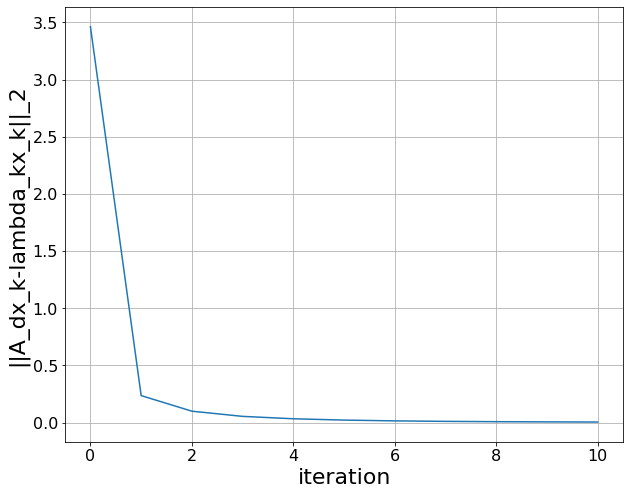

In [59]:
plt.figure(figsize=(10,8))
plt.plot(range(11), nevyazka, label = 'Residuals')
plt.xlabel("iteration", fontsize=22)
plt.ylabel("||A_dx_k-lambda_kx_k||_2", fontsize=22)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Выведем имена top-10 авторов по величине PageRank'a на основании графа DBLP с $d=0.85$. Сравним результат со списком наиболее цитируемых авторов.

Заметим, что степенной метод как раз сходится к вектору рангов авторов

In [72]:
top_PageRank = np.argsort(eigvec)[-10:][::-1]
top_authors_PageRank = authors[np.argsort(eigvec)[-10:][::-1]]

In [73]:
for i in range(10):
    print(top_authors_PageRank[i], top_PageRank[i])

David E. Goldberg 207967
Richard M. Karp 809825
Azriel Rosenfeld 93689
John E. Hopcroft 463529
Ronald L. Rivest 826078
Anil K. Jain 66833
Takeo Kanade 939899
Alfred V. Aho 39826
Robert Endre Tarjan 814950
Gerard Salton 314824


Заметим, что в двух списках только $1$ общий автор Anil K. Jain

То есть если автора часто цитируют, то это не всегда означает, что он особо выдающийся. Нужно брать во внимание, кто именно на этого автора ссылается, насколько их мнение авторитетно. Выбранный подход для подсчёта PageRank'a как раз это учитывает.

## Решение треугольных разреженных систем (30 pts)

В этой задаче рассмотрим более детально методы решения треугольных (нижне или верхне) линейных систем при условии, что матрицы этих систем разрежены. С этой задачей вы столкнётесь после того, как выполните разреженное LU разложение и получите желаемые *разреженные* треугольные факторы.

- (5 pts) Реализуйте классический метод решения треугольной линейной системы, однако учтите, что матрица у вас разреженная. Какой формат хранения разреженной матрицы будет предпочтительным для такого метода решения?

- (10 pts) В пункте выше не предполагались никакие специфичные свойства правой части. Однако если предположить, что правая часть является разреженным вектором, то можно предложить более эффективный метод решения такой линейной системы. Основная идея состоит в том, чтобы преобразовать метод из предыдущего пункта из построчного заполнения решения в итерирование по **столбцам** матрицы и соответствующего обновления решения. Какой формат хранения матриы является предпочтительным для такого метода решения? Перепишите метод из предыдущего пункта, так чтобы итерирование происходило по столбцам матрицы, и реализуйте его.

- (15 pts) Дальнейшим развитием является предположение, что помимо разреженной правой части **само решения** также является разреженным. В этом случае можно дополнительно ускорить метод, если рассматривать не все столбцы матрицы, а только те, что действительно влияют на заполненность решения. Для определения таких столбцов необходимо выяснить какие элементы решения окажутся ненулевыми, если в правой части есть ненулевой элемент на позиции $i$? Для ответа на этот вопрос вам поможет графовая интерпретация разреженной матрицы и понятие топологической сортировки. Реализуйте метод решения треугольной разреженной системы в таких предположениях.

- (10 pts) Проведите сравнение реализованных выше методов на разреженных треугольных (верхне и нижне) матрицах и правых частях удовлестворяющих перечисленным выше свойствам. Экспериментально проверьте, в каких случаях, какой метод является предпочтительным. Приведите теоретическую оценку сложности каждого из методов.

In [3]:
# Example of triangular sparse matrix generation
import numpy as np
import scipy.sparse as spsp
import scipy.sparse.linalg as spsplin
import matplotlib.pyplot as plt

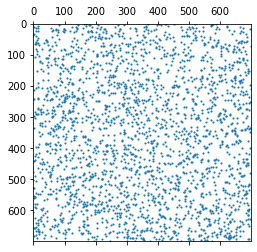

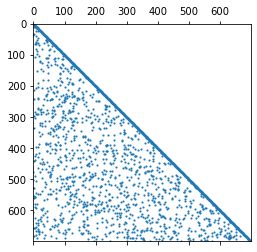

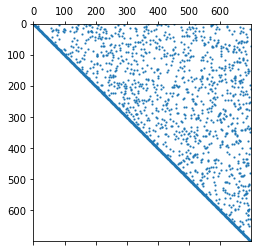

In [30]:
n = 700
A = spsp.rand(n, n, density=0.005).tocsc()
plt.spy(A, markersize=1)
plt.show()
L = spsp.tril(A) + spsp.eye(n)
U = spsp.triu(A) + spsp.eye(n)
plt.spy(L, markersize=1)
plt.show()
plt.spy(U, markersize=1)
plt.show()

In [ ]:
# Место для Вашего решения